# **1. Library**

## **1-1. Install**

colab 동작의 경우 주기적인 업데이트로 인해 버전의 호환성을 업데이터 하는것이 중요

아래의 주석처리된 설치 코드의 경우 pytorch 1.6.0, cuda 10.1을 기준으로 작성된 코드

In [ ]:
#!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
#!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
#!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
#!conda install -q -y -c conda-forge python=3.7
#!conda install -q -y -c conda-forge rdkit==2020.09.2
#!pip install torch-geometric \
#  torch-sparse==latest+cu101 \
#  torch-scatter==latest+cu101 \
#  torch-cluster==latest+cu101 \
#  -f https://pytorch-geometric.com/whl/torch-1.6.0.html
#!sudo apt-get update
#!sudo apt-get install libxrender1

In [ ]:
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__

TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda

CUDA = format_cuda_version(CUDA_version)
print(TORCH, CUDA)

1.11.0 cu113


In [ ]:
!pip install torch-geometric\
  torch-sparse==0.6.15 \
  torch-scatter==2.0.9 \
  torch-cluster==1.6.0 \
  torch-spline-conv==1.2.1 \
  -f https://data.pyg.org/whl/torch-1.11.0+cu113.html

In [ ]:
!pip install torch-geometric==2.1.0

In [ ]:
!pip install rdkit-pypi -qqq

## **1-2. Import**

본 예제에서 사용하는 모든 라이브러리, 패키지 및 모듈 import 와 RDKit 사용을 위한 시스템 경로 설정을 작성합니다.  
사용하는 라이브러리, 패키지 및 모듈에 대한 설명은 다음과 같습니다.  

sys : 파이썬 인터프리터가 제공하는 변수와 함수를 직접 제어할 수 있게 해주는 모듈입니다.  

os : 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈입니다.  

numpy : 벡터 및 행렬 연산에 있어서 매우 편리한 기능을 제공하는 라이브러리입니다.  

pandas : 파이썬 데이터 처리를 위한 라이브러리로 numpy와 함께 데이터 분석에 있어 필수 라이브러리로 사용되고 있습니다.  

json : python 타입을 json 형태의 문자열로 바꾸거나 반대의 기능을 제공하는 모듈입니다.  

pickle : 객체의 형태를 그대로 유지하면서 파일에 저장하고 불러올 수 있게 하는 모듈입니다.  

networkx : 그래프를 다루기 위한 라이브러리입니다.

math : 복잡한 연산을 다루기 위한 모듈입니다.  

random : 임의의 숫자를 생성하거나 다양한 랜덤 관련 함수를 제공하는 모듈입니다.  

collections : 튜플, 딕셔너리 객체에 대한 확장 데이터 구조를 제공하는 모듈입니다.  

scipy : 과학 기술 계산용 함수 및 알고리즘을 제공하는 라이브러리입니다.  

torch : 파이썬을 기반으로 하는 Scientific Computing 패키지이며 GPU를 제대로 이용하기 위한 numpy의 대체제로 사용하거나 딥 러닝 연구 플랫폼으로 사용합니다.  

torch_geometric : 그래프 데이터 핸들링 및 학습에 사용하는 라이브러리입니다. 해당 라이브러리를 사용하기 위해선 pytorch와 cuda의 버전을 맞춰줘야 하며, 본 예제에서 사용하는 pytorch 버전은 1.11.0, cuda 버전은 11.3로 설정했습니다.  
*(Colab에 맞는 cuda 버전인 11.3에 맞춘 버전)*

rdkit : 화학물질의 정보를 담고 있는 파일형식의 데이터를 이용해서 화학물질의 구조이미지 구조 식을 만들어내는 패키지입니다.

In [ ]:
import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

import os
import numpy as np
import pandas as pd
import json,pickle
import networkx as nx
from math import sqrt
from random import shuffle
from collections import OrderedDict
from scipy import stats
from IPython.display import SVG
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import MolFromSmiles
from torch_geometric import data as DATA
from torch_geometric.data import InMemoryDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_max_pool as gmp
from torch_geometric.nn import GCNConv, GATConv, GINConv, global_add_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

# 시각화 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

데이터 및 사전 학습 파일을 불러오기 위해 wget 명령어로 파일을 다운로드 받습니다.

In [ ]:
!wget bit.ly/3hadHIb

/content/drive/My Drive/GraphDTA 라는 디렉토리를 생성하고, 다운로드받은 파일을 해당 경로에 압축해제합니다.

In [ ]:
!mkdir -p /content/drive/My\ Drive/GraphDTA
!unzip -o 3hadHIb -d /content/drive/My\ Drive/GraphDTA

# **2. Create Data**

## **2-1. Compound Representation**

RDKit Visualization

In [ ]:
def moltosvg(mol,molSize=(600,400),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg

In [ ]:
def render_svg(svg):
    return SVG(svg.replace('svg:',''))

### **2-1-1. Atom Feature Define**

원자 특성 정의(one-hot encoding)  
one-hot encoding : 단 하나의 값만 True, 나머지는 모두 False로 치환하는 인코딩

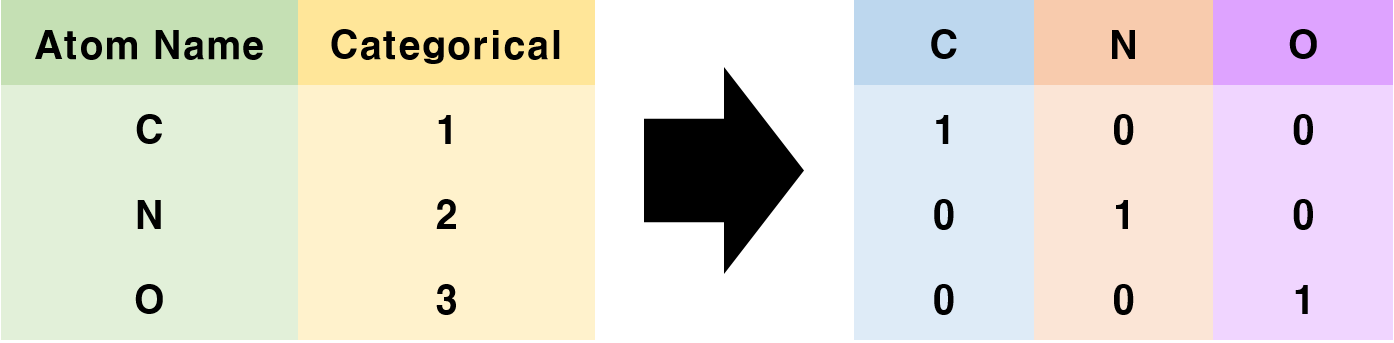

In [ ]:
def one_of_k_encoding(x, allowable_set):
    if x not in allowable_set:
        raise Exception("input {0} not in allowable set{1}:".format(x, allowable_set))
    return list(map(lambda s: x == s, allowable_set))

In [ ]:
def one_of_k_encoding_unk(x, allowable_set):
    """Maps inputs not in the allowable set to the last element."""
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

Symbol(44), Degree(11), TotalNumHs(11), ImplicitValence(11), IsAromatic(1) 정보를 이어붙여 총 78차원의 원자 특성 생성

In [ ]:
def atom_features(atom):
    return np.array(one_of_k_encoding_unk(atom.GetSymbol(),['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na','Ca', 'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb','Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H','Li', 'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr','Cr', 'Pt', 'Hg', 'Pb', 'Unknown']) +
                    one_of_k_encoding(atom.GetDegree(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    one_of_k_encoding_unk(atom.GetTotalNumHs(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    one_of_k_encoding_unk(atom.GetImplicitValence(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    [atom.GetIsAromatic()])

### **2-1-2. Atom Feature Define(Example)**

SMILES 문자열 하나를 rdkit.Chem.MolFromSmiles를 이용해 분자 그래프 형식으로 변환합니다.  
<https://cactus.nci.nih.gov/chemical/structure>

SMILES 문자열로부터 그래프 데이터(행렬) 생성

In [ ]:
example_smile = 'CC(=O)Nc1ccc(cc1)O'
example_mol = Chem.MolFromSmiles(example_smile)
render_svg(moltosvg(example_mol))

예시 분자는 n개의 원자로 구성되어 있음을 알 수 있습니다.

In [ ]:
len(example_mol.GetAtoms())

In [ ]:
example_mol

n개의 원자는 0부터 n-1까지의 index가 부여가 되는데요, 따라서 example_atom_index 변수의 값을 0부터 n-1 사이의 임의의 값으로 바꾸어 예제를 실행해보도록 하겠습니다.

In [ ]:
example_atom_index = 1

In [ ]:
example_feature = atom_features(example_mol.GetAtoms()[example_atom_index])
example_feature

In [ ]:
# Node feature - symbol
example_feature[:44]

In [ ]:
# Node feature - degree
example_feature[44:55]

In [ ]:
# Node feature - total_num_Hs
example_feature[55:66]

In [ ]:
# Node feature - implicit_num_Hs
example_feature[66:77]

In [ ]:
# Node feature - is_aromatic
example_feature[77:]

### **2-1-3. SMILES to Graph**

SMILES 문자열로부터 그래프 데이터(행렬) 생성

In [ ]:
# Returns : 원자 개수, 원자 특성 행렬, 인접 행렬
def smile_to_graph(smile):
    # SMILES 문자열로부터 분자 그래프 데이터 생성
    mol = Chem.MolFromSmiles(smile)

    # mol.GetNumAtoms() : 분자에 소속되어 있는 원자의 개수
    c_size = mol.GetNumAtoms()

    features = []

    # 분자에 소속되어 있는 원자들을 순회하면서 원자 특성 정보 수집
    for atom in mol.GetAtoms():
        feature = atom_features(atom)
        # 정규화?
        features.append( feature / sum(feature) )

    edges = []
    # 분자를 이루는 원자들의 연결 구조 정보를 순회하면서 인접 정보 수집
    # 연결 구조 정보 : 시작 원자 index, 끝 원자 index
    for bond in mol.GetBonds():
        edges.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])

    # 연결 구조 정보를 통한 방향 그래프 생성
    g = nx.Graph(edges).to_directed()
    edge_index = []
    for e1, e2 in g.edges:
        edge_index.append([e1, e2])

    return c_size, features, edge_index

### **2-1-4. SMILES to Graph(Example)**

In [ ]:
example_mol = Chem.MolFromSmiles(example_smile)
render_svg(moltosvg(example_mol))

예시 분자를 구성하는 원자의 개수를 출력합니다.

In [ ]:
example_c_size = example_mol.GetNumAtoms()
example_c_size

예시 분자를 구성하는 원자들의 특성 행렬을 출력합니다.

In [ ]:
example_features = []

for atom in example_mol.GetAtoms():
    feature = atom_features(atom)
    example_features.append( feature / sum(feature) )

example_features[0]

예시 분자를 구성하는 원자들의 특성 행렬을 히트맵으로 표현합니다.

In [ ]:
plt.rcParams['figure.figsize'] = (16,8)
sns.heatmap(example_features)

예시 분자들을 구성하는 원자들의 결합 정보를 출력합니다.

In [ ]:
example_edges = []

for bond in example_mol.GetBonds():
    example_edges.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])

example_edges[:10]

In [ ]:
print(len(example_edges), len(example_edges[0]))

원자 결합 정보를 바탕으로 networkx 라이브러리를 활용하여 방향 그래프로 데이터를 변환합니다.

In [ ]:
example_graph = nx.Graph(example_edges).to_directed()
example_graph

In [ ]:
example_edge_index = []

for e1, e2 in example_graph.edges:
    example_edge_index.append([e1, e2])

example_edge_index[:10]

In [ ]:
print(len(example_edge_index), len(example_edge_index[0]))

networkx로 표현된 방향 그래프를 인접 행렬로 변환하여 표현합니다.

In [ ]:
adj_matrix = nx.adjacency_matrix(example_graph)
print(adj_matrix.todense())

인접  행렬을 히트맵으로 표현합니다.

<Axes: >

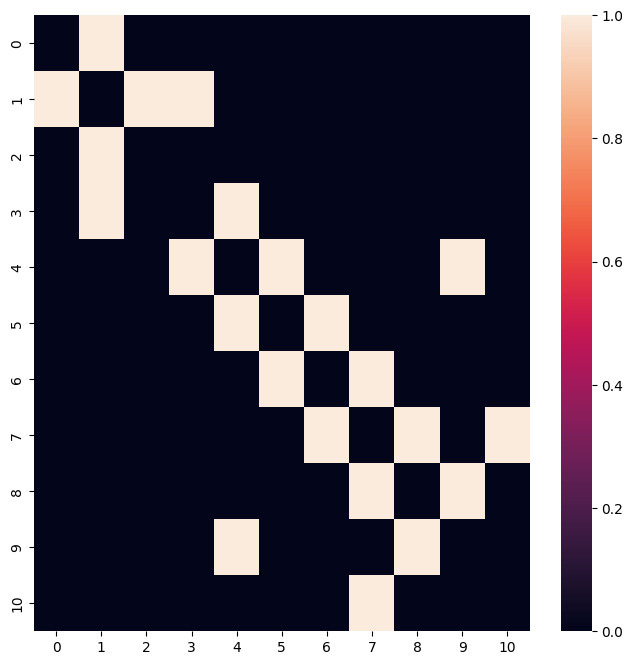

In [ ]:
plt.rcParams['figure.figsize'] = (8,8)
sns.heatmap(adj_matrix.todense())

## **2-2 Protein Representation**

### **2-2-1. Label Encoding**

In [ ]:
# 표적 염기서열을 이루는 알파벳(25자) vocabulary
seq_voc = "ABCDEFGHIKLMNOPQRSTUVWXYZ"

# 알파벳들을 정수(1 ~ 25)로 매핑
seq_dict = {v:(i+1) for i,v in enumerate(seq_voc)}

# 시퀀스 딕셔너리 길이 : 25
seq_dict_len = len(seq_dict)

# 패딩을 위한 시퀀스 최대 길이 정의
max_seq_len = 1000

In [ ]:
seq_dict

{'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [ ]:
# Returns : 길이가 1000인 Protein Representation(Integer/label encoding)
def seq_cat(prot):
    #  크기가 1000 이고 원소를 0으로 채운 배열 생성
    x = np.zeros(max_seq_len)

    # 시퀀스 딕셔너리를 참조하여 단백질 서열 정보 입력
    for i, ch in enumerate(prot[:max_seq_len]):
        x[i] = seq_dict[ch]

    return x

### **2-2-2. Label Encoding(Example)**

In [ ]:
example_csv = pd.read_csv('/content/drive/My Drive/GraphDTA/data/davis_train.csv')
example_prot_seq = example_csv.target_sequence[7]
example_prot_seq

FileNotFoundError: ignored

In [ ]:
len(example_prot_seq)

In [ ]:
example_seq_cat = seq_cat(example_prot_seq)
example_seq_cat[577:]

In [ ]:
len(example_seq_cat)

## **2.3 Convert Data**

### **2-3-1. Code**

In [ ]:
all_prots = []
datasets = ['kiba']

In [ ]:
for dataset in datasets:
    print('convert data from DeepDTA for ', dataset)

    # 파일 경로 지정 및 로드
    fpath = '/content/drive/My Drive/0923/GraphDTA/data/' + dataset + '/'
    train_fold = json.load(open(fpath + "folds/train_fold_setting1.txt"))
    train_fold = [ee for e in train_fold for ee in e ]
    valid_fold = json.load(open(fpath + "folds/test_fold_setting1.txt"))
    ligands = json.load(open(fpath + "ligands_can.txt"), object_pairs_hook=OrderedDict)
    proteins = json.load(open(fpath + "proteins.txt"), object_pairs_hook=OrderedDict)
    affinity = pickle.load(open(fpath + "Y","rb"), encoding='latin1')

    drugs = []
    prots = []
    for d in ligands.keys():
        # 입체 구조 정보를 포함한 SMILES 문자열
        lg = Chem.MolToSmiles(Chem.MolFromSmiles(ligands[d]),isomericSmiles=True)
        drugs.append(lg)

    for t in proteins.keys():
        # 단백질 서열 정보
        prots.append(proteins[t])

    # davis 데이터셋의 데이터일 경우, 결합 친화도 수치를 로그 공간으로 변환
    if dataset == 'davis':
        affinity = [-np.log10(y/1e9) for y in affinity]

    affinity = np.asarray(affinity)
    opts = ['train','test']

    # 위에서 정의한 drugs와 ports 배열 내의 약물 및 표적 정보에 근거하여 학습 및 테스트 데이터 파일 생성
    for opt in opts:
        rows, cols = np.where(np.isnan(affinity)==False)
        if opt=='train':
            rows,cols = rows[train_fold], cols[train_fold]
        elif opt=='test':
            rows,cols = rows[valid_fold], cols[valid_fold]
        with open('/content/drive/My Drive/0923/GraphDTA/data/' + dataset + '_' + opt + '.csv', 'w') as f:
            f.write('compound_iso_smiles,target_sequence,affinity\n')
            for pair_ind in range(len(rows)):
                ls = []
                ls += [ drugs[rows[pair_ind]]  ]
                ls += [ prots[cols[pair_ind]]  ]
                ls += [ affinity[rows[pair_ind],cols[pair_ind]]  ]
                f.write(','.join(map(str,ls)) + '\n')

    print('\ndataset:', dataset)
    print('train_fold:', len(train_fold))
    print('test_fold:', len(valid_fold))
    print('len(set(drugs)),len(set(prots)):', len(set(drugs)),len(set(prots)))
    all_prots += list(set(prots))

convert data from DeepDTA for  kiba

dataset: kiba
train_fold: 98545
test_fold: 19709
len(set(drugs)),len(set(prots)): 2068 229


### **2-3-2. Data Distribution**

In [ ]:
#davis_train = pd.read_csv('/content/drive/My Drive/GraphDTA/data/davis_train.csv')
#davis_test = pd.read_csv('/content/drive/My Drive/GraphDTA/data/davis_test.csv')
kiba_train = pd.read_csv('/content/drive/My Drive/0923/GraphDTA/data/kiba_train.csv')
kiba_test = pd.read_csv('/content/drive/My Drive/0923/GraphDTA/data/kiba_test.csv')

#davis = pd.concat([davis_test, davis_train])
kiba = pd.concat([kiba_test, kiba_train])

결합친화도 수치 분포도

NameError: ignored

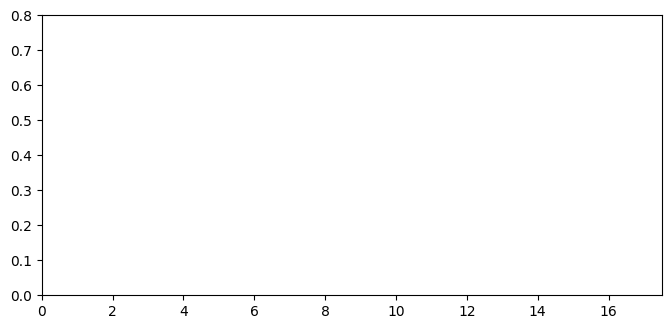

In [ ]:
plt.subplot(211)
plt.xlim(0.0, 17.5)
plt.ylim(0.0, 0.8)

weights_davis = np.ones_like(np.array(davis.affinity.values))/float(len(np.array(davis.affinity.values)))
plt.hist(davis.affinity.values, weights=weights_davis, color='dodgerblue')

plt.subplot(212)
plt.xlim(0.0, 17.5)
plt.ylim(0.0, 0.8)

weights_kiba = np.ones_like(np.array(kiba.affinity.values))/float(len(np.array(kiba.affinity.values)))
plt.hist(kiba.affinity.values, weights=weights_kiba, color='springgreen')

SMILES 길이 분포도

In [ ]:
plt.subplot(211)

length_davis = []
for i in davis.compound_iso_smiles.unique() :
  length_davis.append(len(i))

weights_davis = np.ones_like(np.array(length_davis))
plt.hist(length_davis, weights=weights_davis, color='dodgerblue')

plt.subplot(212)

length_kiba = []
for i in kiba.compound_iso_smiles.unique() :
  length_kiba.append(len(i))

weights_kiba = np.ones_like(np.array(length_kiba))
plt.hist(length_kiba, weights=weights_kiba, color='springgreen')

Protein Sequence 길이 분포도

In [ ]:
plt.subplot(211)
plt.xlim(0, 5000)
plt.ylim(0, 150)

length_davis = []
for i in davis.target_sequence.unique() :
  length_davis.append(len(i))

weights_davis = np.ones_like(np.array(length_davis))
plt.hist(length_davis, weights=weights_davis, color='dodgerblue')

plt.subplot(212)
plt.xlim(0, 5000)
plt.ylim(0, 150)

length_kiba = []
for i in kiba.target_sequence.unique() :
  length_kiba.append(len(i))

weights_kiba = np.ones_like(np.array(length_kiba))
plt.hist(length_kiba, weights=weights_kiba, color='springgreen')

### **2-3-3. Data Exploration**

In [ ]:
example_fpath = '/content/drive/My Drive/0923/GraphDTA/data/kiba/'

In [ ]:
example_train_fold = json.load(open(example_fpath + "folds/train_fold_setting1.txt"))
example_train_fold = [ee for e in example_train_fold for ee in e ]
print(len(example_train_fold), example_train_fold[:10])

98545 [113703, 51222, 98078, 29622, 80976, 112045, 13772, 30711, 60861, 37749]


In [ ]:
example_valid_fold = json.load(open(example_fpath + "folds/test_fold_setting1.txt"))
print(len(example_valid_fold), example_valid_fold[:10])

19709 [34121, 51548, 12611, 104850, 23744, 79716, 47565, 6166, 113707, 26852]


In [ ]:
print(len(set(example_train_fold) - set(example_valid_fold)))
print(len(set(example_valid_fold) - set(example_train_fold)))

98545
19709


In [ ]:
example_ligands = json.load(open(example_fpath + "ligands_can.txt"), object_pairs_hook=OrderedDict)

In [ ]:
len(example_ligands)

In [ ]:
list(example_ligands.keys())[:10]

In [ ]:
list(example_ligands.values())[:10]

In [ ]:
example_proteins = json.load(open(example_fpath + "proteins.txt"), object_pairs_hook=OrderedDict)

In [ ]:
len(example_proteins)

In [ ]:
len(set(list(example_proteins.keys())))

In [ ]:
list(example_proteins.keys())[:10]

In [ ]:
list(example_proteins.values())[441]

In [ ]:
len(set(list(example_proteins.values())))

In [ ]:
example_affinity = pickle.load(open(example_fpath + "Y","rb"), encoding='latin1')

In [ ]:
example_affinity

In [ ]:
example_affinity.shape

In [ ]:
np.isnan(example_affinity).sum()

## **2-4. Real Data(CSV)**

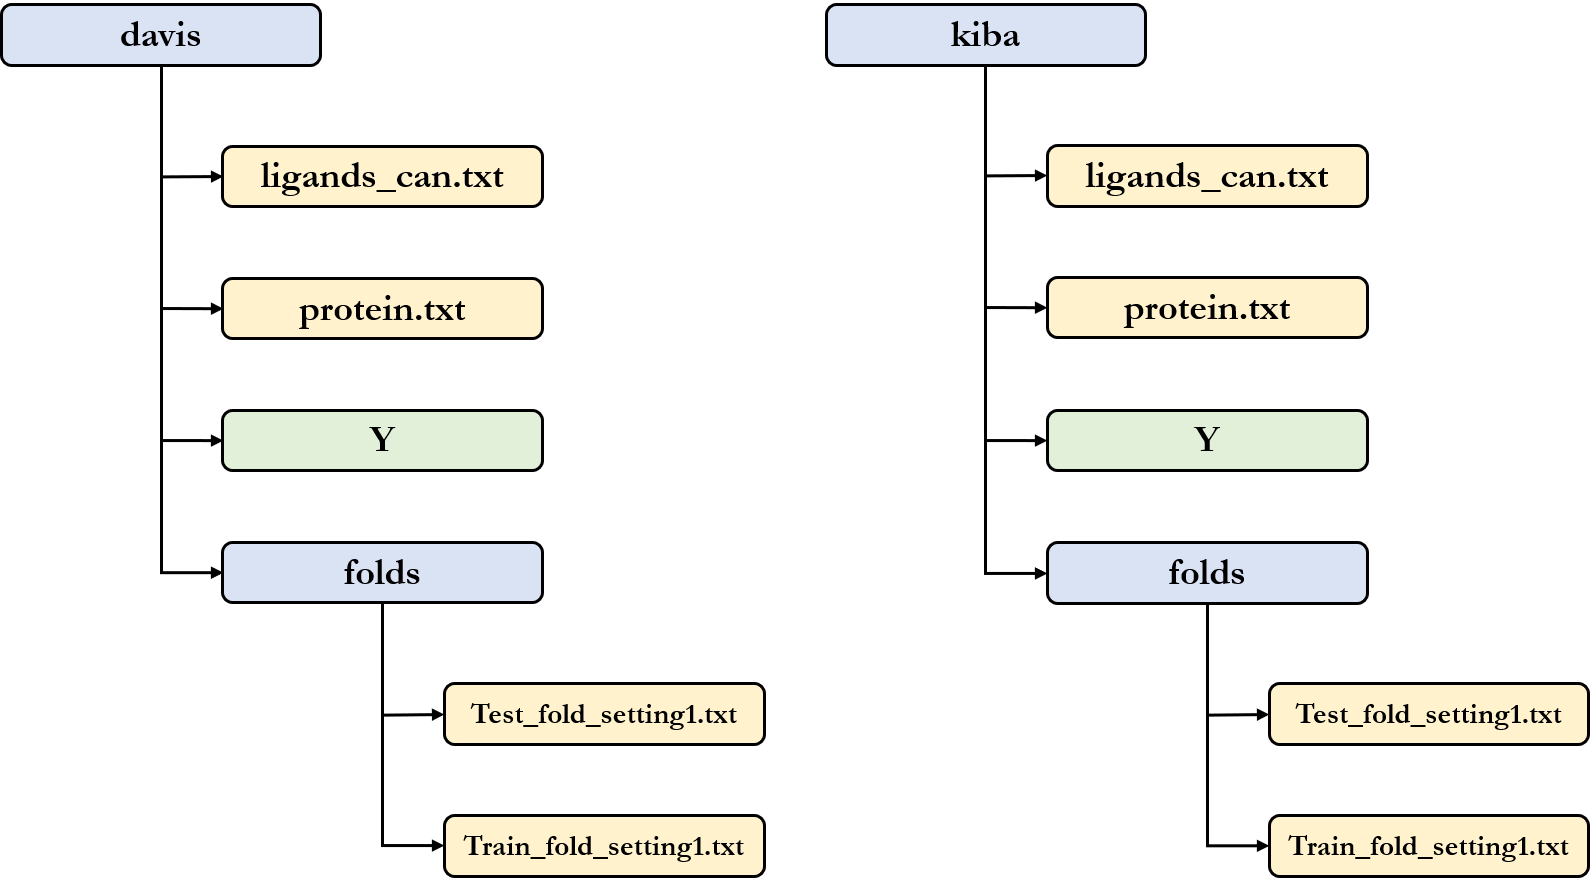

### **2-4-1. Load Data**

In [ ]:
#davis_train = pd.read_csv('/content/drive/My Drive/GraphDTA/data/davis_train.csv')
#davis_test = pd.read_csv('/content/drive/My Drive/GraphDTA/data/davis_test.csv')
kiba_train = pd.read_csv('/content/drive/My Drive/0923/GraphDTA/data/kiba_train.csv')
kiba_test = pd.read_csv('/content/drive/My Drive/0923/GraphDTA/data/kiba_test.csv')

### **2-4-2. Data Exploration**

In [ ]:
kiba_train

,compound_iso_smiles,target_sequence,affinity
0,O=C1c2c(c3c4ccc(O)cc4n(C4OC(CO)C(O)C(O)C4O)c3c...,MSANNSPPSAQKSVLPTAIPAVLPAASPCSSPKTGLSARLSNGSFS...,9.798970
1,N#Cc1ccc(NC(=O)Nc2ccnc3cc(C(F)(F)F)ccc23)nc1,MLGAVEGPRWKQAEDIRDIYDFRDVLGTGAFSEVILAEDKRTQKLV...,11.400000
2,CCNc1nc2cc(Cl)c(OC)cc2nc1NCC,MEPAAGFLSPRPFQRAAAAPAPPAGPGPPPSALRGPELEMLAGLPT...,11.200000
3,CNc1ncnc2c1N=C(c1ccc(NC(=O)Nc3cccc(C(F)(F)F)c3...,MELRVGNRYRLGRKIGSGSFGDIYLGTDIAAGEEVAIKLECVKTKH...,11.200000
4,C#Cc1cc2c(cc1OC)-c1[nH]nc(-c3ccc(C#N)nc3)c1C2,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,11.999998
...,...,...,...
98540,CCCn1c(C2CCNCC2)nc(-c2ccc(Cl)c(Cl)c2)c1-c1ccnc...,MSDSKCDSQFYSVQVADSTFTVLKRYQQLKPIGSGAQGIVCAAFDT...,13.800057
98541,CCOC(=O)c1nc2c(=O)[nH]c3cc([N+](=O)[O-])c(NC(C...,MAKATSGAAGLRLLLLLLLPLLGKVALGLYFSRDAYWEKLYVDQAA...,11.600000
98542,NC(COc1cncc(-c2ccc3c(c2)CC(=O)N3)c1)Cc1c[nH]c2...,MADEDLIFRLEGVDGGQSPRAGHDGDSDGDSDDEEGYFICPITDDP...,11.500000
98543,Cc1[nH]nc2ccc(-c3cccnc3)cc12,MGPGVLLLLLVATAWHGQGIPVIEPSVPELVVKPGATVTLRCVGNG...,10.600000


In [ ]:
davis_test.head(10)

In [ ]:
kiba_train.head(10)

In [ ]:
kiba_test.head(10)

## **2-5. Testbed Dataset**

### **2-5-1. Code**

In [ ]:
compound_iso_smiles = []

for dt_name in ['kiba']:
    opts = ['train','test']

    for opt in opts:
        df = pd.read_csv('/content/drive/My Drive/0923/GraphDTA/data/' + dt_name + '_' + opt + '.csv')
        compound_iso_smiles += list( df['compound_iso_smiles'] )

# 분자 정보 중복 제거
compound_iso_smiles = set(compound_iso_smiles)
smile_graph = {}

# SMILES 문자열을 그래프 형태로 변환하여 딕셔너리 형태로 저장
for smile in compound_iso_smiles:
    g = smile_to_graph(smile)
    smile_graph[smile] = g

In [ ]:
class TestbedDataset(InMemoryDataset):
    def __init__(self, root='/tmp', dataset='kiba',
                 xd=None, xt=None, y=None, transform=None,
                 pre_transform=None,smile_graph=None):

        # 전처리된 데이터 저장을 위한 경로, 기본값은 '/tmp'
        super(TestbedDataset, self).__init__(root, transform, pre_transform)

        # 벤치마크 데이터 셋으로 기본값은 'davis'
        self.dataset = dataset

        # 전처리 데이터가 존재하면 프로세스를 건너 뛰고 데이터 로드
        if os.path.isfile(self.processed_paths[0]):
            print('Pre-processed data found: {}, loading ...'.format(self.processed_paths[0]))
            self.data, self.slices = torch.load(self.processed_paths[0])
        # 그렇지 않으면 프로세스를 실행하고 데이터 로드
        else:
            print('Pre-processed data {} not found, doing pre-processing...'.format(self.processed_paths[0]))
            self.process(xd, xt, y,smile_graph)
            self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        pass

    @property
    def processed_file_names(self):
        return [self.dataset + '.pt']

    def download(self):
        pass

    def _download(self):
        pass

    def _process(self):
        if not os.path.exists(self.processed_dir):
            os.makedirs(self.processed_dir)

    # XD : SMILES 목록
    # XT : 인코딩된 단백질(표적) 목록(one-hot encoding)
    # Y : 레이블 목록(결합 친화도)
    # Return : PyTorch-Geometric 형식으로 처리된 데이터
    def process(self, xd, xt, y,smile_graph):
        assert (len(xd) == len(xt) and len(xt) == len(y)), "The three lists must be the same length!"
        data_list = []
        data_len = len(xd)

        # Graph Convolutional Networks Model의 입력 형식에 맞게 데이터 변환
        # 행 단위로 반복(xd, xt, y)
        for i in range(data_len):
            print('Converting SMILES to graph: {}/{}'.format(i+1, data_len))
            smiles = xd[i]
            target = xt[i]
            labels = y[i]

            # smile_graph : RDKit을 활용하여 분자 그래프 표현으로 변환된 SMILES 값
            c_size, features, edge_index = smile_graph[smiles]

            # GCNData : PyTorch Geometrics GCN 알고리즘에 대한 그래프 데이터
            # torch.Tensor : 텐서 자료형으로 Numpy의 배열(ndarray)와 유사한 자료형
            # x : 특성 행렬
            # edge_index : 인접 행렬
            # labels : 결합 친화도
            # target : 표적(단백질)
            GCNData = DATA.Data(x=torch.Tensor(features),
                                edge_index=torch.LongTensor(edge_index).transpose(1, 0),
                                y=torch.FloatTensor([labels]))
     #####GCNData.target = torch.LongTensor([target])
            GCNData.target=torch.Tensor([target]).to(torch.long)

            # c_size : 하나의 compound에 소속되어 있는 원자의 개수
            GCNData.__setitem__('c_size', torch.LongTensor([c_size]))

            # 그래프, 레이블, 표적 서열을 데이터 목록에 추가
            data_list.append(GCNData)

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        print('Graph construction done. Saving to file.')
        data, slices = self.collate(data_list)

        # 전처리 데이터 저장
        torch.save((data, slices), self.processed_paths[0])

In [ ]:
datasets = ['kiba'] ## Make Processed Data

# PyTorch 데이터 포맷으로 변환
for dataset in datasets:
    # 전처리 데이터 로드
    processed_data_file_train = '/content/drive/My Drive/0923/GraphDTA/data/processed/' + dataset + '_train.pt'
    processed_data_file_test = '/content/drive/My Drive/0923/GraphDTA/data/processed/' + dataset + '_test.pt'

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_test))):
        df = pd.read_csv('/content/drive/My Drive/0923/GraphDTA/data/' + dataset + '_train.csv')
        train_drugs, train_prots,  train_Y = list(df['compound_iso_smiles']),list(df['target_sequence']),list(df['affinity'])
        XT = [seq_cat(t) for t in train_prots]
        train_drugs, train_prots,  train_Y = np.asarray(train_drugs), np.asarray(XT), np.asarray(train_Y)

        df = pd.read_csv('/content/drive/My Drive/0923/GraphDTA/data/' + dataset + '_test.csv')
        test_drugs, test_prots,  test_Y = list(df['compound_iso_smiles']),list(df['target_sequence']),list(df['affinity'])
        XT = [seq_cat(t) for t in test_prots]
        test_drugs, test_prots,  test_Y = np.asarray(test_drugs), np.asarray(XT), np.asarray(test_Y)

        # PyTorch Geometric 데이터 생성
        print('preparing ', dataset + '_train.pt in pytorch format!')
        train_data = TestbedDataset(root='/content/drive/My Drive/0923/GraphDTA/data', dataset=dataset+'_train', xd=train_drugs, xt=train_prots, y=train_Y,smile_graph=smile_graph)
        print('preparing ', dataset + '_test.pt in pytorch format!')
        test_data = TestbedDataset(root='/content/drive/My Drive/0923/GraphDTA/data', dataset=dataset+'_test', xd=test_drugs, xt=test_prots, y=test_Y,smile_graph=smile_graph)
        print(processed_data_file_train, ' and ', processed_data_file_test, ' have been created')
    else:
        print(processed_data_file_train, ' and ', processed_data_file_test, ' are already created')

/content/drive/My Drive/0923/GraphDTA/data/processed/kiba_train.pt  and  /content/drive/My Drive/0923/GraphDTA/data/processed/kiba_test.pt  are already created


### **2-5-2. Data Exploration**

davis_train.csv 파일을 예시로 데이터가 어떤 형식으로 모델의 입력으로 들어가는지 살펴보겠습니다.  
아래의 코드는 davis_train.csv 파일의 첫 번째 행을 예시로 코드를 작성했습니다.  
해당 파일의 다른 행을 보시려면 변수 row_index의 값을 0 ~ 25045 사이의 값으로 바꿔주시면 됩니다.

In [ ]:
train_drugs, train_prots,  train_Y = list(davis_train['compound_iso_smiles']),list(davis_train['target_sequence']),list(davis_train['affinity'])

In [ ]:
row_index = 5

SMILES 문자열 예시입니다.

In [ ]:
train_drugs[row_index]

표적 시퀀스 예시입니다.

In [ ]:
train_prots[row_index]

결합 친화도 예시입니다.

In [ ]:
train_Y[row_index]

알파벳으로 구성된 표적 시퀀스를 정수형으로 변환합니다.

In [ ]:
XT = [seq_cat(t) for t in train_prots]

In [ ]:
XT[row_index][:100]

In [ ]:
train_drugs, train_prots,  train_Y = np.asarray(train_drugs), np.asarray(XT), np.asarray(train_Y)

SMILES 문자열을 원자 개수, 원자 특성 행렬, 인접 행렬로 이루어진 그래프 데이터 형식으로 변환합니다.

In [ ]:
c_size, features, edge_index = smile_graph[train_drugs[row_index]]

In [ ]:
c_size

In [ ]:
features[0]

In [ ]:
print(len(features), len(features[0]))

In [ ]:
edge_index[:10]

In [ ]:
len(edge_index)

원자 특성 데이터를 텐서 형식으로 저장합니다.

In [ ]:
f = torch.Tensor(features)
f

In [ ]:
torch.Tensor(features).shape

인접 행렬을 전치 연산하여 텐서 형식으로 저장합니다.

In [ ]:
e = torch.LongTensor(edge_index).transpose(1, 0)
e

In [ ]:
torch.LongTensor(edge_index).transpose(1, 0).shape

결합 친화도 데이터를 텐서 형식으로 저장합니다.

In [ ]:
l = torch.FloatTensor([train_Y[row_index]])
l

In [ ]:
gd = DATA.Data(x=f, edge_index=e, y=l)

In [ ]:
gd.target = torch.LongTensor([XT[row_index]])
gd.__setitem__('c_size', torch.LongTensor([c_size]))

In [ ]:
gd

# **3. Performance Evaluation Index Definition**

## **3-1. Mean Square Error**

추정값의 평균 제곱 오차 또는 평균 제곱 편차는 오차의 제곱 평균, 즉 추정값과 실제 값 간의 평균 제곱 차를 측정

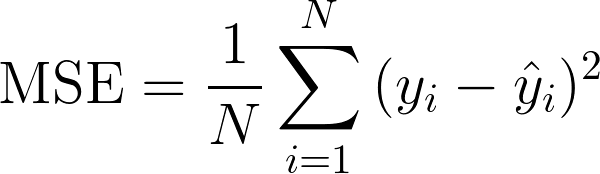

In [ ]:
def mse(y,f):
    mse = ((y - f)**2).mean(axis=0)
    return mse

In [ ]:
y = np.random.random_sample((5, ))
print(y)
f = np.random.random_sample((5, ))
print(f)
print(mse(y,f))

[0.04442284 0.41657971 0.05922142 0.5793205  0.08357393]
[0.21937173 0.74909839 0.61168316 0.19856137 0.48988093]
0.15129053276750107


## **3-2. Root Mean Square Error**

추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도

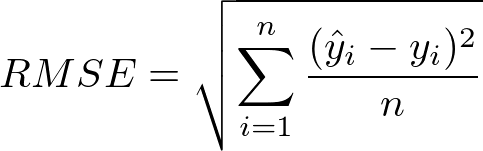

In [ ]:
def rmse(y,f):
    rmse = sqrt(((y - f)**2).mean(axis=0))
    return rmse

In [ ]:
y = np.random.random_sample((5, ))
print(y)
f = np.random.random_sample((5, ))
print(f)
print(rmse(y,f))

[0.96329612 0.42450673 0.20016734 0.93834447 0.99146744]
[0.2627991  0.54483568 0.12047033 0.63807056 0.1034056 ]
0.5273224835899324


## **3-3. Pearson Correlation Coefficient**

변수 X 와 Y 간의 선형 상관 관계를 계량화한 수치

pearson-formula.png

In [ ]:
def pearson(y,f):
    rp = np.corrcoef(y, f)[0,1]
    return rp

In [ ]:
y = np.random.random_sample((5, ))
print(y)
f = np.random.random_sample((5, ))
print(f)
print(pearson(y,f))

[0.29158346 0.35554128 0.90731382 0.47190733 0.26523979]
[0.94795171 0.13242792 0.23142422 0.99586526 0.62840625]
-0.41917687657105734


## **3-4. Spearman's Rank Correlation Coefficient**

상관 계수를 계산할 두 데이터의 실제 값 대신 순위 rank를 사용해 상관 계수를 계산하는 방식

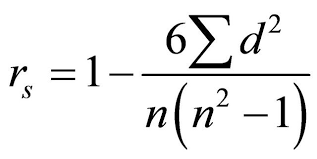

In [ ]:
def spearman(y,f):
    rs = stats.spearmanr(y, f)[0]
    return rs

In [ ]:
y = np.random.random_sample((5, ))
print(y)
f = np.random.random_sample((5, ))
print(f)
print(spearman(y,f))

[0.28910945 0.00995144 0.28439623 0.52619085 0.47749438]
[0.58223769 0.9922713  0.67885927 0.48831395 0.22198319]
-0.8999999999999998


## **3-5. Concordance Index**

샘플들을 실제 결합 친화도의 오름차순으로 나열하고, '각 샘플들보다 실제 결합 친화도가 높은 개수를 모두 더한 총합'과 '각 샘플들보다 결합 친화도가 높을 것으로 올바르게 예측된 샘플들의 개수를 모두 더한 총합'의 비율로 계산

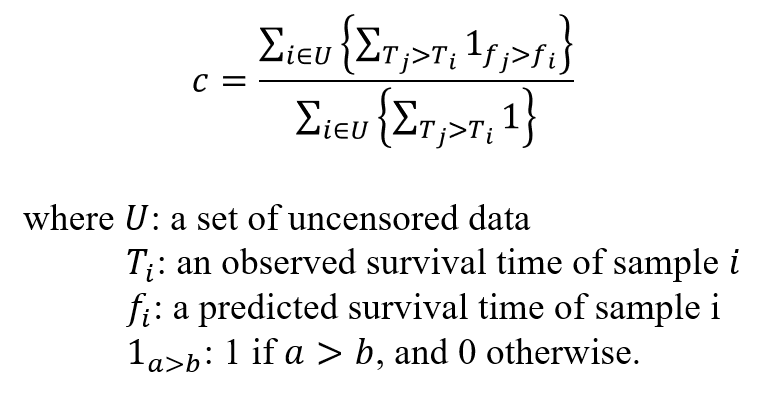

In [ ]:
def ci(y,f):
    ind = np.argsort(y)
    y = y[ind]
    f = f[ind]
    i = len(y)-1
    j = i-1
    z = 0.0
    S = 0.0
    while i > 0:
        while j >= 0:
            if y[i] > y[j]:
                z = z+1
                u = f[i] - f[j]
                if u > 0:
                    S = S + 1
                elif u == 0:
                    S = S + 0.5
            j = j - 1
        i = i - 1
        j = i-1
    ci = S/z
    return ci

In [ ]:
y = np.array([0,1,2,3])
f = np.array([1,0,3,2])
ci(y, f)

0.6666666666666666

# **4. Model**

## **4-1. GCN**

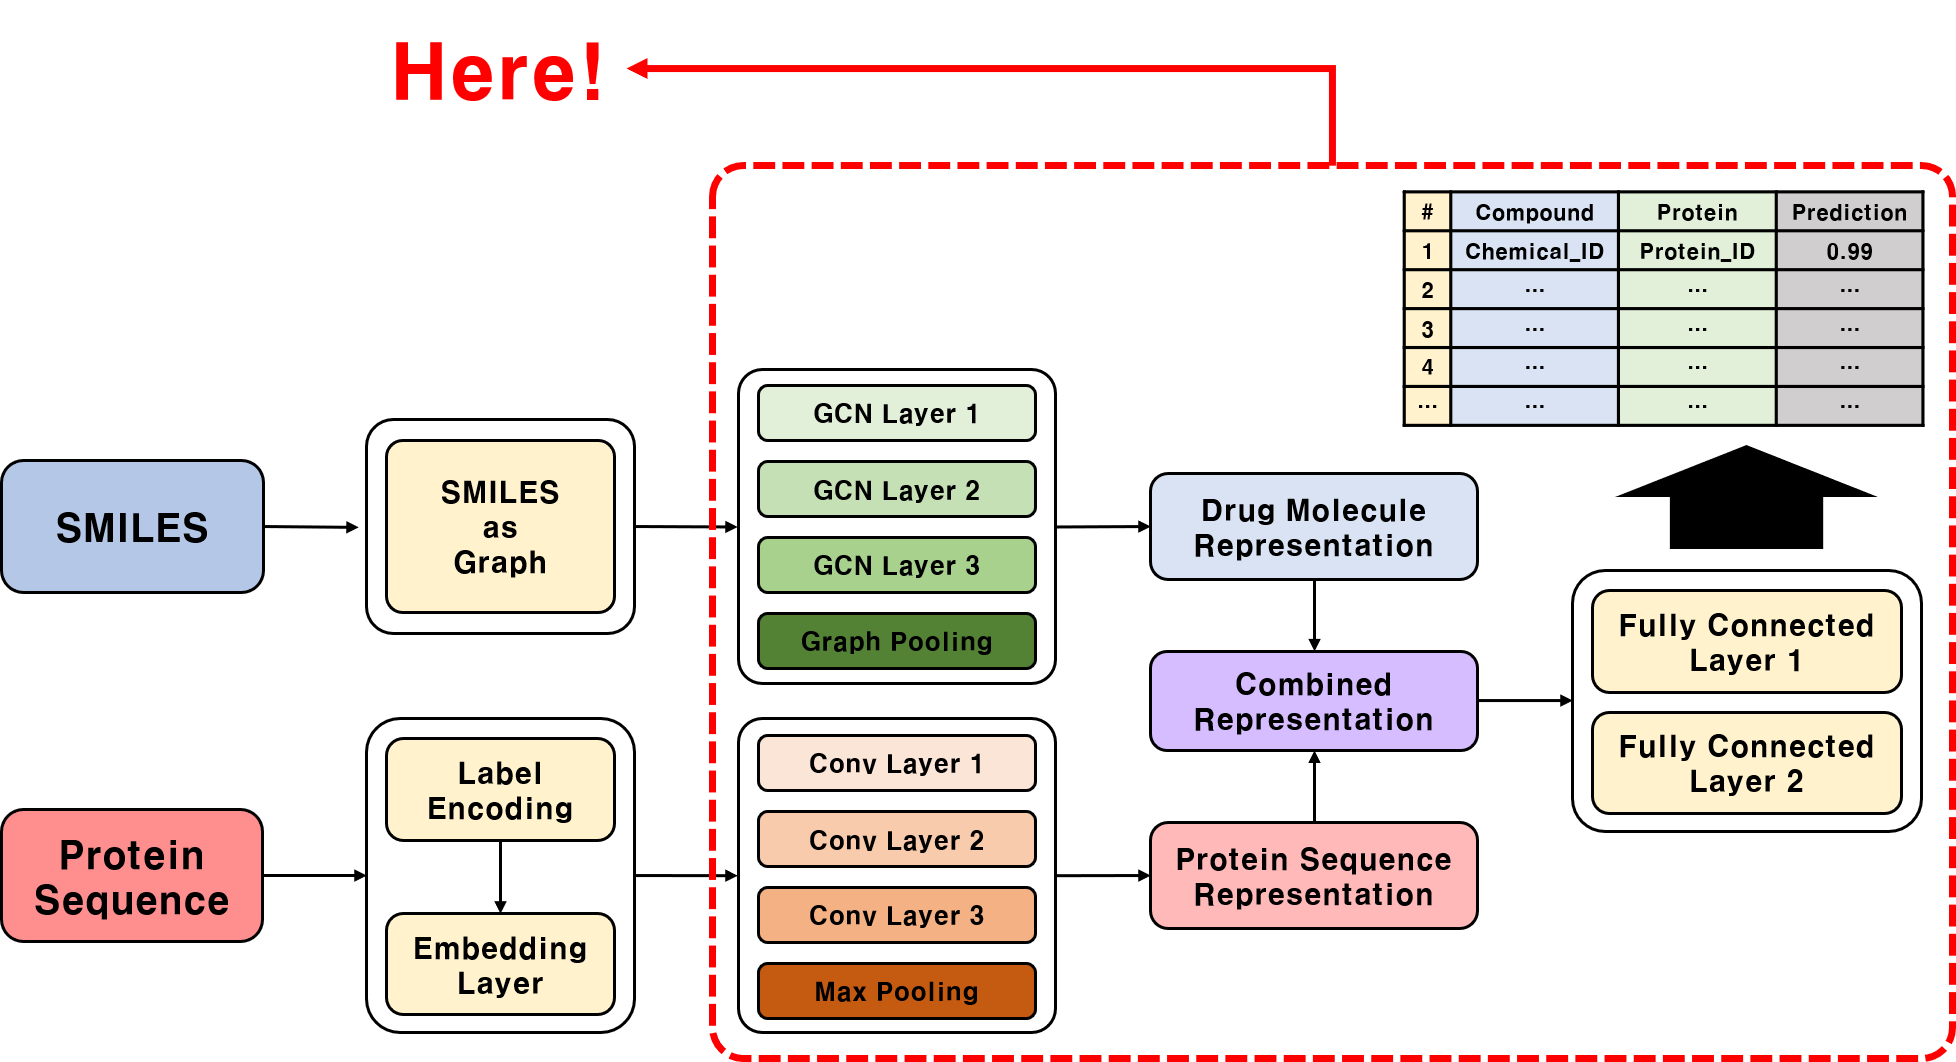

In [ ]:
# GCN based model
class GCNNet(torch.nn.Module):
    def __init__(self, n_output=1, n_filters=32, embed_dim=128,num_features_xd=78, num_features_xt=25, output_dim=128, dropout=0.2):

        super(GCNNet, self).__init__()

        # 약물 분자 표현을 위한 GCN 구성

        # 모델의 출력은 하나의 실수로 나타낸 결합 친화도 값입니다. 따라서 n_output=1 입니다.
        self.n_output = n_output

        # Graph Convolutional Networks

        # 첫 번째 인자는 in_channels로 각 입력 샘플의 크기를 나타냅니다.
        # N 개의 노드와 E개의 엣지로 구성된 그래프 graph(N,E)가 존재할 때, 각 노드를 d 차원으로 임베딩한다면, n * d 차원의 입력값을 구할 수 있습니다.
        # 여기서는 각 노드를 78 차원의 특성으로 나눴으므로 첫 번째 그래프 합성곱 층의 입력 샘플 크기는 78로 주어집니다.
        # 두 번째 인자는 out_channels로 각 출력 샘플의 크기를 나타냅니다.
        self.conv1 = GCNConv(num_features_xd, num_features_xd)

        # 다음 층으로 진행할수록 고차원의 특성을 뽑아내기 위해 출력 샘플의 크기를 두 배씩 늘려줍니다.
        self.conv2 = GCNConv(num_features_xd, num_features_xd*2)
        self.conv3 = GCNConv(num_features_xd*2, num_features_xd * 4)

        # Graph Convolution Layer를 통해 312개의 특성으로 출력된 값들을 입력으로 하여 Linear 함수를 통해 선형 변환을 거쳐 1024개의 출력으로 변환합니다(Fully-Connected).
        self.fc_g1 = torch.nn.Linear(num_features_xd*4, 1024)
        self.fc_g2 = torch.nn.Linear(1024, output_dim)

        # 활성화함수는 어떠한 신호를 입력받아 이를 적절한 처리를 하여 출력해주는 함수입니다.
        # 이를 통해 출력된 신호가 다음 단계에서 활성화 되는지를 결정합니다.
        # ReLU는 활성화함수의 일종으로, 0 미만의 값은 0으로, 0 이상의 값은 그대로 전달하는 함수입니다.
        self.relu = nn.ReLU()

        # Dropout은 딥러닝 시 과적합 문제를 해결하기 위해 은닉층 노드 중 일부를 제거하는 학습기법 입니다.
        # 은닉층 노드 중 일부를 제거함으로써 특정 뉴런의 가중치나 영향이 감소하므로 보다 강건한 신경망을 구성할 수 있게 해줍니다.
        self.dropout = nn.Dropout(dropout)

        # 단백질 서열 표현을 위한 1D Conv 층 구성

        # 학습 가능한 임베딩 테이블을 생성합니다.
        # 첫 번째 인자는 num_embeddings로 임베딩을 할 단어들의 개수, 즉 단어 집합의 크기입니다.
        # 1을 더해준 이유는 Create Data 부분에서 단백질 서열을 정수화 인코딩을 할 때 입력 크기를 맞추기 위한 패딩 0을 넣었습니다.
        # 따라서 1 ~ 25 의 정수로 이루어진 단어 집합에 0을 추가하여 총 26개의 단어 집합을 입력으로 합니다.
        # 두 번째 인자는 embedding_dim으로 임베딩을 할 벡터의 차원입니다. 해당 부분은 사용자가 정해주는 하이퍼 파라미터입니다.
        self.embedding_xt = nn.Embedding(num_features_xt + 1, embed_dim)

        # 각 단백질 서열은 길이 1000에 맞춰 패딩을 삽입하여 변환을 했습니다. 따라서 in_channels=1000 입니다.
        # out_channels는 각 출력 샘플의 크기를 나타냅니다. 여기서는 n_filter=32로 설정했습니다.
        # 단백질 서열을 구성하는 각 정수(단어)는 128 차원으로 임베딩되었습니다. 따라서 실제 출력되는 형식은 다음과 같습니다.
        # out_channels(32) * (embed_dim(128) - kernel_size(8) + 1) = 32*121
        self.conv_xt_1 = nn.Conv1d(in_channels=1000, out_channels=n_filters, kernel_size=8)

        # GCN Layer와 마찬가지로 32*121개의 특성으로 출력된 값들을 입력으로 하여 Linear 함수를 통해 선형 변환을 거쳐 output_dim개의 출력으로 변환합니다(Fully-Connected).
        self.fc1_xt = nn.Linear(32*121, output_dim)

        # GCN Layer를 통해 생성된 Drug Molecule Representation과 Conv1d Layer를 통해 생성된 Protein Representation을 결합하는 Fully-Connected Layer 입니다.
        # 두 Representation은 출력 크기가 output_dim으로 결합 크기는 output_dim*2가 됩니다.
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)

        # 최종으로 출력되는 값은 하나의 실수로 나타낸 결합 친화도 값입니다. 따라서 최종 출력 크기는 n_output=1 입니다.
        self.out = nn.Linear(512, self.n_output)

    def forward(self, data):
        # 약물 분자 입력
        # x : 원자 특성 행렬
        # edge_index : 인접 행렬
        # batch : batch size
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # 단백질 서열 입력
        # target : 단백질 서열 정보
        target = data.target

        # Graph Convolutional Networks Layer
        x = self.conv1(x, edge_index)
        x = self.relu(x)

        x = self.conv2(x, edge_index)
        x = self.relu(x)

        x = self.conv3(x, edge_index)
        x = self.relu(x)

        # gmp : global max pooling
        x = gmp(x, batch)

        # 활성화(self.relu), 전결합(self.fc_g1, self.fc_g2) 및 정규화(self.dropout)
        x = self.relu(self.fc_g1(x))
        x = self.dropout(x)
        x = self.fc_g2(x)
        x = self.dropout(x)

        # Convolutional Neural Networks Layer(1D)
        embedded_xt = self.embedding_xt(target)
        conv_xt = self.conv_xt_1(embedded_xt)

        # 행렬의 형식을 변환합니다.
        # 단백질 서열 정보가 입력되는 Conv1d Layer는 출력 형식이 1차원입니다.
        # 이를 완전 연결 층의 입력으로 사용하기 위해선 2차원으로 형식을 변환해주어야 합니다.
        # view는 텐서를 재구성해주는 함수이며, 아래 코드는 기존 1차원 형식의 출력값을 2차원으로 변형해주는 코드입니다.
        xt = conv_xt.view(-1, 32 * 121)
        xt = self.fc1_xt(xt)

        # GCN Layer를 통해 생성된 Drug Molecule Representation과 Conv1d Layer를 통해 생성된 Protein Representation을 torch.cat 함수를 통해 하나로 결합합니다.
        xc = torch.cat((x, xt), 1)

        # 최종으로 출력되는 값은 하나의 실수로 나타낸 결합 친화도 값입니다.
        # 따라서 전결합(fc1, fc2, out), 활성화(self.relu) 및 정규화(dropout)를 통해 하나의 값을 출력합니다.
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        return out

**Activation Function(ReLU) 참고자료**

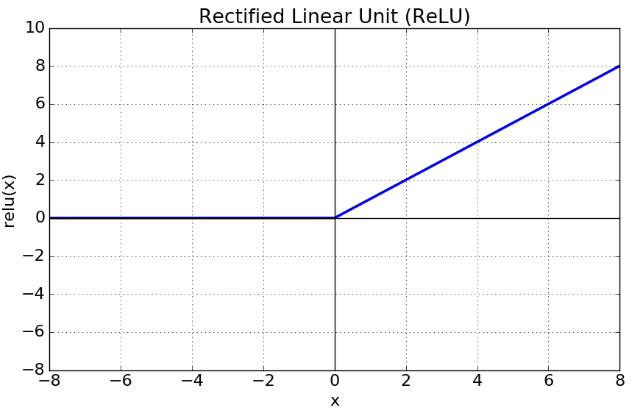

**Dropout 참고자료**

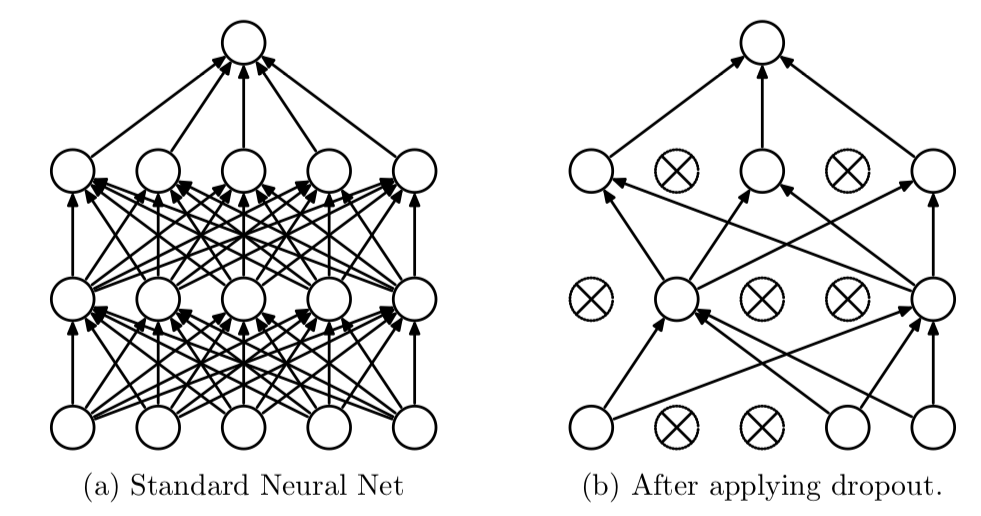

## **4-2. GAT**

In [ ]:
# GAT based model
class GATNet(torch.nn.Module):
    def __init__(self, num_features_xd=78, n_output=1, num_features_xt=25,
                     n_filters=32, embed_dim=128, output_dim=128, dropout=0.2):
        super(GATNet, self).__init__()

        # 약물 분자 표현을 위한 GAT 층 구성
        self.gcn1 = GATConv(num_features_xd, num_features_xd, heads=10, dropout=dropout)
        self.gcn2 = GATConv(num_features_xd * 10, output_dim, dropout=dropout)
        self.fc_g1 = nn.Linear(output_dim, output_dim)

        # 단백질 서열 표현을 위한 1D Conv 층 구성
        self.embedding_xt = nn.Embedding(num_features_xt + 1, embed_dim)
        self.conv_xt1 = nn.Conv1d(in_channels=1000, out_channels=n_filters, kernel_size=8)
        self.fc_xt1 = nn.Linear(32*121, output_dim)

        # 층 결합
        self.fc1 = nn.Linear(256, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.out = nn.Linear(256, n_output)

        # 활성화 및 정규화(flatten)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = F.dropout(x, p=0.2, training=self.training)
        x = F.elu(self.gcn1(x, edge_index))
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.gcn2(x, edge_index)
        x = self.relu(x)
        # gmp : global max pooling
        x = gmp(x, batch)
        x = self.fc_g1(x)
        x = self.relu(x)

        target = data.target
        embedded_xt = self.embedding_xt(target)
        conv_xt = self.conv_xt1(embedded_xt)
        conv_xt = self.relu(conv_xt)

        # flatten
        xt = conv_xt.view(-1, 32 * 121)
        xt = self.fc_xt1(xt)

        # concat
        xc = torch.cat((x, xt), 1)
        # Dense 층 추가
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        return out

## **4-3. GAT_GCN**

In [ ]:
# GCN-CNN based model
class GAT_GCN(torch.nn.Module):
    def __init__(self, n_output=1, num_features_xd=78, num_features_xt=25,
                 n_filters=32, embed_dim=128, output_dim=128, dropout=0.2):

        super(GAT_GCN, self).__init__()

        # 약물 분자 표현을 위한 GAT 및 GCN 층 구성
        self.n_output = n_output
        self.conv1 = GATConv(num_features_xd, num_features_xd, heads=10)
        self.conv2 = GCNConv(num_features_xd*10, num_features_xd*10)
        self.fc_g1 = torch.nn.Linear(num_features_xd*10*2, 1500)
        self.fc_g2 = torch.nn.Linear(1500, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        # 단백질 서열 표현을 위한 1D Conv 층 구성
        self.embedding_xt = nn.Embedding(num_features_xt + 1, embed_dim)
        self.conv_xt_1 = nn.Conv1d(in_channels=1000, out_channels=n_filters, kernel_size=8)
        self.fc1_xt = nn.Linear(32*121, output_dim)

        # 층 결합
        self.fc1 = nn.Linear(256, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.out = nn.Linear(512, self.n_output)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        target = data.target
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        x = self.relu(x)
        # gmp : global max pooling
        # gap : global mean pooling
        x = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)
        x = self.relu(self.fc_g1(x))
        x = self.dropout(x)
        x = self.fc_g2(x)

        embedded_xt = self.embedding_xt(target)
        conv_xt = self.conv_xt_1(embedded_xt)
        # flatten
        xt = conv_xt.view(-1, 32 * 121)
        xt = self.fc1_xt(xt)

        # concat
        xc = torch.cat((x, xt), 1)
        # Dense 층 추가
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        return out

## **4-4. GIN**

In [ ]:
# GINConv model
class GINConvNet(torch.nn.Module):
    def __init__(self, n_output=1,num_features_xd=78, num_features_xt=25,
                 n_filters=32, embed_dim=128, output_dim=128, dropout=0.2):

        super(GINConvNet, self).__init__()

        dim = 32

        # 약물 분자 표현을 위한 GIN 층 구성
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.n_output = n_output
        nn1 = Sequential(Linear(num_features_xd, dim), ReLU(), Linear(dim, dim))
        self.conv1 = GINConv(nn1)
        self.bn1 = torch.nn.BatchNorm1d(dim)

        nn2 = Sequential(Linear(dim, dim), ReLU(), Linear(dim, dim))
        self.conv2 = GINConv(nn2)
        self.bn2 = torch.nn.BatchNorm1d(dim)

        nn3 = Sequential(Linear(dim, dim), ReLU(), Linear(dim, dim))
        self.conv3 = GINConv(nn3)
        self.bn3 = torch.nn.BatchNorm1d(dim)

        nn4 = Sequential(Linear(dim, dim), ReLU(), Linear(dim, dim))
        self.conv4 = GINConv(nn4)
        self.bn4 = torch.nn.BatchNorm1d(dim)

        nn5 = Sequential(Linear(dim, dim), ReLU(), Linear(dim, dim))
        self.conv5 = GINConv(nn5)
        self.bn5 = torch.nn.BatchNorm1d(dim)

        self.fc1_xd = Linear(dim, output_dim)

        # 단백질 서열 표현을 위한 1D Conv 층 구성
        self.embedding_xt = nn.Embedding(num_features_xt + 1, embed_dim)
        self.conv_xt_1 = nn.Conv1d(in_channels=1000, out_channels=n_filters, kernel_size=8)
        self.fc1_xt = nn.Linear(32*121, output_dim)

        # 층 결합
        self.fc1 = nn.Linear(256, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.out = nn.Linear(256, self.n_output)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        target = data.target

        x = F.relu(self.conv1(x, edge_index))
        x = self.bn1(x)
        x = F.relu(self.conv2(x, edge_index))
        x = self.bn2(x)
        x = F.relu(self.conv3(x, edge_index))
        x = self.bn3(x)
        x = F.relu(self.conv4(x, edge_index))
        x = self.bn4(x)
        x = F.relu(self.conv5(x, edge_index))
        x = self.bn5(x)
        x = global_add_pool(x, batch)
        x = F.relu(self.fc1_xd(x))
        x = F.dropout(x, p=0.2, training=self.training)

        embedded_xt = self.embedding_xt(target)
        conv_xt = self.conv_xt_1(embedded_xt)
        # flatten
        xt = conv_xt.view(-1, 32 * 121)
        xt = self.fc1_xt(xt)

        # concat
        xc = torch.cat((x, xt), 1)
        # Dense 층 추가
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        return out

# **5. Training**

## **5-1. Train**

In [ ]:
# training function at each epoch
def train(model, device, train_loader, optimizer, epoch):
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()

    # train_loader에서 batch를 불러와 학습을 진행합니다.
    for batch_idx, data in enumerate(train_loader):
        # 학습에 사용할 데이터를 불러옵니다.
        data = data.to(device)

        # optimizer는 딥러닝 프로세스에서 실제 파라미터를 갱신시키는 부분입니다.
        # 오차 역전파 알고리즘과 같은 방식으로, 각 파라미터의 기울기를 이용하여 실제 가중치의 변화를 주는 부분입니다.
        # 역전파 단계 전에, 모델의 학습 가능한 가중치인 Optimizer 객체를 사용하여 갱신할 변수들에 대한 모든 변화도를 0으로 초기화합니다.
        # 이렇게 설정하는 이유는 기본적으로 역전파(loss.backward)를 호출할 때마다 변화도가 버퍼에 덮어쓰이지 않고 누적되기 때문입니다.
        # 더 자세한 내용은 torch.autograd.backward documentation을 참조하시면 됩니다.
        optimizer.zero_grad()

        # 순전파 단계 : 모델에 data를 전달하여 예상되는 output을 계산합니다.
        output = model(data)

        # 손실을 계산하고 출력합니다.
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))

        # 역전파 단계 : 모델의 매개변수에 대한 손실의 변화도를 계산합니다.
        loss.backward()

        # Optimizer 객체의 step 함수를 호출하면 매개변수가 갱신됩니다.
        optimizer.step()

        # 진행 상황을 출력합니다.
        if batch_idx % LOG_INTERVAL == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))

**Optimizer 참고자료**  
https://bl.ocks.org/EmilienDupont/raw/aaf429be5705b219aaaf8d691e27ca87/  
손실 최소화를 시작하려면 함수 히트 맵의 아무 곳이나 클릭하시면 됩니다.  
하단 막대의 원을 클릭하면 다양한 알고리즘들의 시각화를 활성화/비활성화 할 수 있습니다.  
전역 최소값은 왼쪽이 배치되어 있으며, 지역 최소값은 오른쪽에 배치되어 있습니다.

## **5-2. Predict**

In [ ]:
def predicting(model, device, loader):
    model.eval()

    # 학습을 통해 예측된 값을 저장합니다.
    total_preds = torch.Tensor()

    # 실제 값을 저장합니다.
    total_labels = torch.Tensor()

    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)

    # n차원 형태의 텐서를 1차원 형태로 평평하게 만들어 반환합니다.
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

## **5-3. Main**

In [ ]:
datasets = ['kiba']
modeling = [GINConvNet, GATNet, GAT_GCN, GCNNet]
cuda_name = "cuda:0"

아래의 코드는 하이퍼 파라미터입니다.  
하이퍼 파라미터란 학습 프로세스 제어에 사용되는 값을 갖는 매개 변수입니다. 이와 반대로 다른 파라미터의 값은 훈련을 통해 도출됩니다.  

TRAIN_BATCH_SIZE : 학습에 사용되는 데이터의 배치 크기입니다.  

TEST_BATCH_SIZE : 테스트에 사용되는 데이터의 배치 크기입니다.  

LR : Learning Rate로 학습율을 뜻합니다.  

LOG_INTERVAL : log를 찍는 간격입니다.  

NUM_EPOCHS : 훈련 반복 횟수입니다.

In [ ]:
TRAIN_BATCH_SIZE = 512
TEST_BATCH_SIZE = 512
LR = 0.0005
LOG_INTERVAL = 20
NUM_EPOCHS = 10

In [ ]:
# Main program: iterate over different datasets
print('-----------------------------------------------------')
print('Select Dataset Number...')
print('|  0 : davis  |  1 : kiba  |')
d = int(input())
print('The ' + datasets[d] + ' dataset has been selected!')
print('-----------------------------------------------------')
print('Select Mo0del Number...')
print('|  0 : GIN  |  1 : GAT  |  2 : GAT_GCN  |  3 : GCN  |')
m = int(input())
print('The ' + modeling[m].__name__ + ' model has been selected!')
print('-----------------------------------------------------')
print('\nrunning on ', modeling[m].__name__ + '_' + datasets[d])

processed_data_file_train = '/content/drive/My Drive/0923/GraphDTA/data/processed/' + datasets[d] + '_train.pt'
processed_data_file_test = '/content/drive/My Drive/0923/GraphDTA/data/processed/' + datasets[d] + '_test.pt'

if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_test))):
    print('실행이 되지 않는다면 processed 디렉토리와 안의 파일을 삭제하고, 2.5.1의 데이터 생성 코드를 재실행하세요')
else:
    train_data = TestbedDataset(root='/content/drive/My Drive/0923/GraphDTA/data', dataset=datasets[d]+'_train')
    test_data = TestbedDataset(root='/content/drive/My Drive/0923/GraphDTA/data', dataset=datasets[d]+'_test')

    # make data PyTorch mini-batch processing ready
    train_loader = DataLoader(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False)

    # training the model
    device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
    model = modeling[m]().to(device)

    # 모델의 손실함수로 MSE(Mean Square Error)를 사용합니다.
    loss_fn = nn.MSELoss()

    # 옵티마이저는 Adam을 사용합니다.
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)

    best_mse = 1000
    best_ci = 0
    best_epoch = -1

    # 학습을 진행하면서 모델의 변화를 저장합니다.
    model_file_name = 'model_' + modeling[m].__name__ + '_' + datasets[d] +  '.model'
    result_file_name = 'result_' + modeling[m].__name__ + '_' + datasets[d] +  '.csv'

    for epoch in range(NUM_EPOCHS):
        train(model, device, train_loader, optimizer, epoch+1)

        # G : 실제 값
        # P : 모델 학습을 통해 예측한 값
        G,P = predicting(model, device, test_loader)

        # 다양한 성능평가지표를 저장합니다.
        ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P),ci(G,P)]

        if ret[1]<best_mse:
            torch.save(model.state_dict(), model_file_name)
            with open(result_file_name,'w') as f:
                f.write(','.join(map(str,ret)))
            best_epoch = epoch+1
            best_mse = ret[1]
            best_ci = ret[-1]
            print('rmse improved at epoch ', best_epoch, '; best_mse,best_ci:', best_mse,best_ci,modeling[m],datasets[d])
        else:
            print(ret[1],'No improvement since epoch ', best_epoch, '; best_mse,best_ci:', best_mse,best_ci,modeling[m],datasets[d])

-----------------------------------------------------
Select Dataset Number...
|  0 : davis  |  1 : kiba  |
0
The kiba dataset has been selected!
-----------------------------------------------------
Select Mo0del Number...
|  0 : GIN  |  1 : GAT  |  2 : GAT_GCN  |  3 : GCN  |
0
The GINConvNet model has been selected!
-----------------------------------------------------

running on  GINConvNet_kiba
Pre-processed data found: /content/drive/My Drive/0923/GraphDTA/data/processed/kiba_train.pt, loading ...
Pre-processed data found: /content/drive/My Drive/0923/GraphDTA/data/processed/kiba_test.pt, loading ...
Training on 98545 samples...
Train epoch: 1 [0/98545 (0%)]	Loss: 155.565353
Train epoch: 1 [279220/98545 (10%)]	Loss: 7.856099
Train epoch: 1 [549920/98545 (21%)]	Loss: 1.847546
Train epoch: 1 [837360/98545 (31%)]	Loss: 1.585216
Train epoch: 1 [1115120/98545 (41%)]	Loss: 1.472692
Train epoch: 1 [1394200/98545 (52%)]	Loss: 1.211315
Train epoch: 1 [1694880/98545 (62%)]	Loss: 1.234176
T

# **6. Predict with pretrained model**

**사전 학습 모델을 사용하면 학습 단계를 건너뛰고 예측 단계부터 시작하여 성능 평가를 진행합니다.**  
**코드는 5번 과정의 Predict, Main과 동일합니다.**

## **6-1. Predict**

In [ ]:
def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

## **6-2. Sample Test**

In [ ]:
datasets = ['davis','kiba']
modelings = [GINConvNet, GATNet, GAT_GCN, GCNNet]
cuda_name = "cuda:0"

In [ ]:
TEST_BATCH_SIZE = 512

In [ ]:
print('-----------------------------------------------------')
print('Select Dataset Number...')
print('|  0 : davis  |  1 : kiba  |')
d = int(input())
print('The ' + datasets[d] + ' dataset has been selected!')
print('-----------------------------------------------------')
print('Select Model Number...')
print('|  0 : GIN  |  1 : GAT  |  2 : GAT_GCN  |  3 : GCN  |')
m = int(input())
print('The ' + modelings[m].__name__ + ' model has been selected!')
print('-----------------------------------------------------')
print('\nrunning on ', modelings[m].__name__ + '_' + datasets[d])

result = []

processed_data_file_test = '/content/drive/My Drive/GraphDTA/data/processed/' + datasets[d] + '_test.pt'

if (not os.path.isfile(processed_data_file_test)):
    print('please run create_data.py to prepare data in pytorch format!')
else:
    test_data = TestbedDataset(root='/content/drive/My Drive/GraphDTA/data', dataset=datasets[d]+'_test')
    test_loader = DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False)

    model_st = modelings[m].__name__
    print('\npredicting for ', datasets[d], ' using ', model_st)

    # training the model
    device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
    model = modelings[m]().to(device)
    model_file_name = '/content/drive/My Drive/GraphDTA/pretrained/model_' + model_st + '_' + datasets[d] +  '.model'

    if os.path.isfile(model_file_name):
        model.load_state_dict(torch.load(model_file_name, map_location=cuda_name), strict=False)
        G,P = predicting(model, device, test_loader)
        ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P),ci(G,P)]
        ret =[datasets[d], model_st] +  [round(e,3) for e in ret]
        result += [ ret ]
        print('dataset,model,rmse,mse,pearson,spearman,ci')
        print(ret)
    else:
        print('model is not available!') ## 0.9, 0.9, -0.1, -0.09, 0.45

In [ ]:
with open('/content/drive/My Drive/GraphDTA/sample_result_' + modelings[m].__name__ + '_' + datasets[d] + '.csv','w') as f:
    f.write('dataset,model,rmse,mse,pearson,spearman,ci\n')

    for ret in result:
        f.write(','.join(map(str,ret)) + '\n')

## **6-3. Main Test**

In [ ]:
result = []
y_pred_array = []

for dataset in datasets :
    processed_data_file_test = '/content/drive/My Drive/GraphDTA/data/processed/' + dataset + '_test.pt'

    if (not os.path.isfile(processed_data_file_test)):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        test_data = TestbedDataset(root='/content/drive/My Drive/GraphDTA/data', dataset=dataset+'_test')
        test_loader = DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False)

        for modeling in modelings :
            model_st = modeling.__name__
            print('\npredicting for ', dataset, ' using ', model_st)

            # training the model
            device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
            model = modeling().to(device)
            model_file_name = '/content/drive/My Drive/GraphDTA/pretrained/model_' + model_st + '_' + dataset +  '.model'

            if os.path.isfile(model_file_name):
                model.load_state_dict(torch.load(model_file_name, map_location=cuda_name), strict=False)
                G,P = predicting(model, device, test_loader)
                y_pred_array.append(G)
                y_pred_array.append(P)
                ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P),ci(G,P)]
                ret =[dataset, model_st] +  [round(e,3) for e in ret]
                result += [ ret ]
                print('dataset,model,rmse,mse,pearson,spearman,ci')
                print(ret)
            else:
                print('model is not available!')

    print('\n')

In [ ]:
with open('/content/drive/My Drive/GraphDTA/result.csv','w') as f:
    f.write('dataset,model,rmse,mse,pearson,spearman,ci\n')

    for ret in result:
        f.write(','.join(map(str,ret)) + '\n')

# **7. Result**

## **7.1 Table**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/GraphDTA/result.csv')
df

## **7.2 Visualization**

In [ ]:
plt.rcParams['figure.figsize'] = (8,8)

In [ ]:
sns.barplot(data=df, x='dataset', y='rmse', hue='model')

In [ ]:
sns.barplot(data=df, x='dataset', y='mse', hue='model')

In [ ]:
sns.barplot(data=df, x='dataset', y='ci', hue='model')

In [ ]:
color = ['mediumpurple', 'lightcoral', 'turquoise', 'navajowhite']

plt.suptitle('Davis Dataset Result')
for i in range(4) :
  plt.subplot(2,2,i+1)
  plt.xlim(4.0, 11.0)
  plt.ylim(4.0, 11.0)
  plt.title(modelings[i].__name__)
  plt.scatter(x=y_pred_array[2*i], y=y_pred_array[2*i+1], c=color[i])

In [ ]:
plt.suptitle('Kiba Dataset Result')

for i in range(4) :
  plt.subplot(2,2,i+1)
  plt.xlim(4.0, 17.0)
  plt.ylim(4.0, 17.0)
  plt.title(modelings[i].__name__)
  plt.scatter(x=y_pred_array[2*i+8], y=y_pred_array[2*i+9], c=color[i])